In [1]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
from os import getcwd
from os.path import join as pjoin
import scipy.io as sio
import skimage.filters as filters

In [56]:
# Get the filename for an example .mat file from the data directory.
data_dir = pjoin(getcwd(), 'data')
mat_fname = pjoin(data_dir, 'fractals_1.mat')

print('mat_fname = ', mat_fname, '\n')

# Load the .mat file contents.
mat_contents = sio.loadmat(mat_fname)
print('mat_contents.keys = ', sorted(mat_contents.keys()))

raw_image_set = mat_contents['X']

mat_fname =  /Users/vincentdong/Documents/College/UCLA/14 Spring 2019/CS 168 - Computational Methods for Medical Imaging/Project/CS168-Automatic-TICI/data/fractals_1.mat 

mat_contents.keys =  ['TICI_Dr1', 'TICI_Dr2', 'TICI_report', 'X', '__globals__', '__header__', '__version__']


In [57]:
# Originally, image_set[:, :, k] is the kth image.
# Preprocess the image_set so that image_set[k, :, :] is the kth image.
image_set = np.transpose(raw_image_set, (2, 0, 1))
print('The shape of the image set is: {}'.format(np.shape(image_set)))

The shape of the image set is: (20, 1024, 1024)


In [58]:
def gray2binary(image_set):
    thresholds = list(map(filters.threshold_li, image_set))
    # When an image's frequency is too low, filters.threshold_li may 
    # cause a divide-by-zero RuntimeWarning, and the corresponding
    # threshold will be 0. So we need to remove zeros in thresholds.
#     thresholds = list(filter(lambda th: th > 0, thresholds))
    print(thresholds)
    
    min_threshold = min(thresholds)
    print('min_threshold = ', min_threshold)
    result = []
    for i in range(len(image_set)):
        result.append(image_set[i] > thresholds[i])
    return result
#     return np.array(list(map(lambda img : img > min_threshold, image_set)))

binary_image_set = gray2binary(image_set)

[0.008492869172541283, 0.008483918574166211, 0.008465017673559786, 0.00848054197728808, 0.008482379499903447, 0.008466404054233616, 0.008404657722212935, 0.008220486859550503, 0.006517470518339202, 0.006395157874710995, 0.006622612768717272, 0.006745116942743873, 0.006869359357606706, 0.007082249130746357, 0.007386930711639393, 0.007646731422202598, 0.007749642451115544, 0.007750620444229103, 0.007840704481734958, 0.007977589821534913]
min_threshold =  0.006395157874710995


32
35
22
31
33
19
15
24
236
232
71
26
10
0
0
0
0
0
0
0
(20, 256, 200)


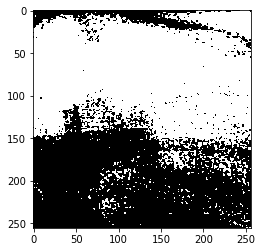

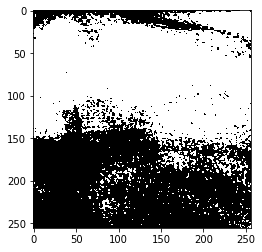

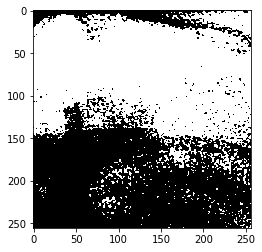

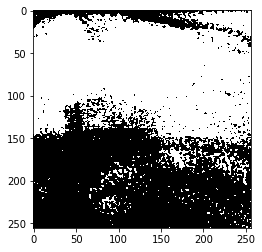

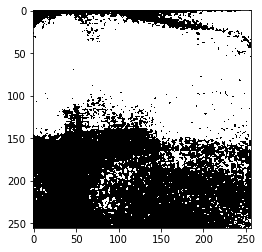

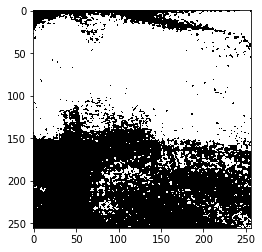

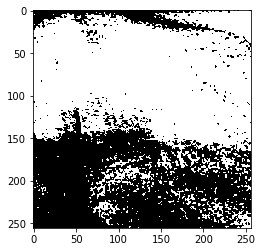

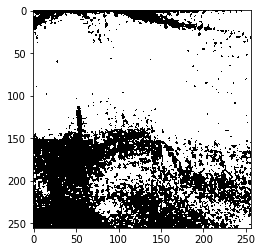

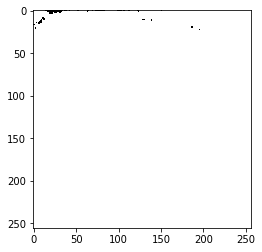

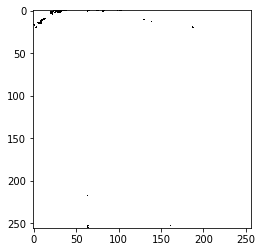

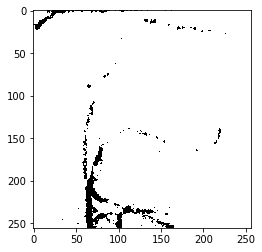

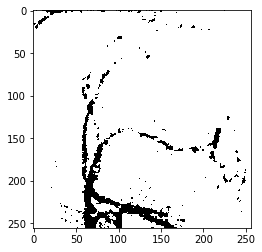

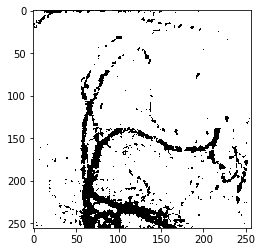

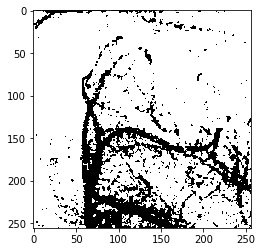

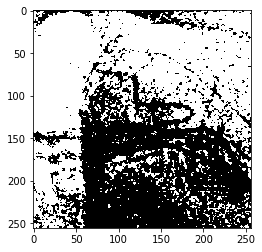

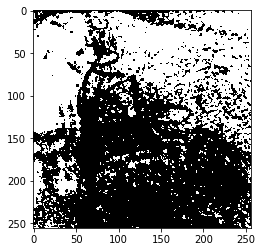

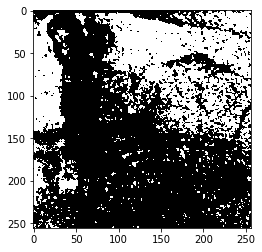

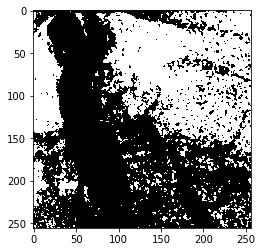

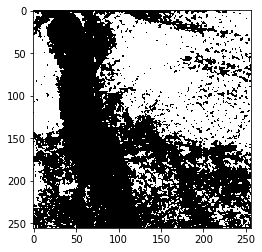

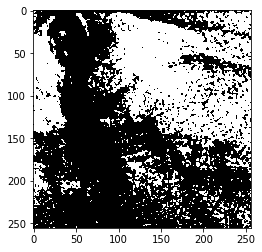

In [59]:
def summarize_middle_artery(image_set):
    # Assume all the images in an image set have the same dimensions.
    image_count, image_height, image_width = np.shape(image_set)
    result = []
    for image in image_set:
        # Only consider the middle 1/4 of the upper 1/4 image.
        middle_section = image[0:int(image_height/4), int(image_width*3/8):int(image_width*5/8)]
        plt.figure()
        plt.imshow(middle_section, cmap='gray')
        
        summary = np.array(list(map(all, middle_section)))
        print(np.count_nonzero(summary))

        summary = np.tile(summary[:, np.newaxis], 200)
        result.append(summary)
    return np.array(result)
    

middle_artery_summary_image_set = summarize_middle_artery(binary_image_set)
print(middle_artery_summary_image_set.shape)

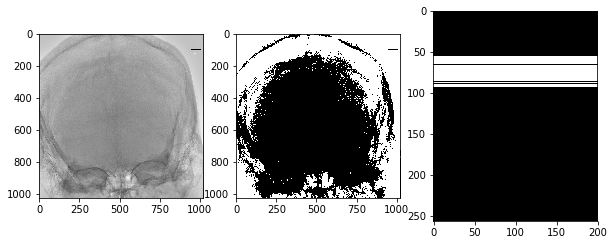

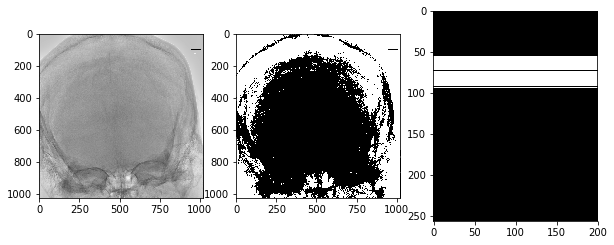

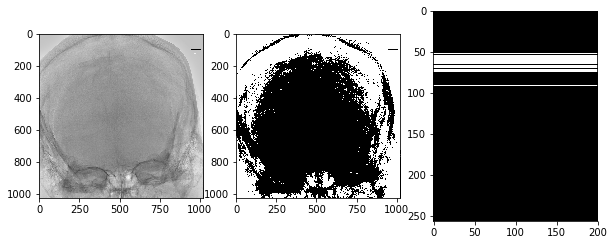

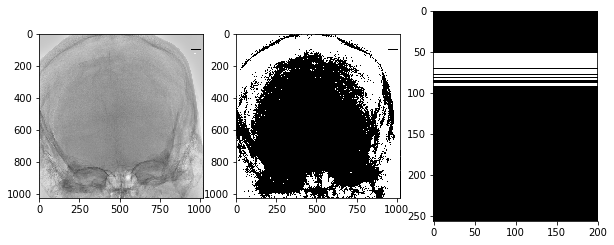

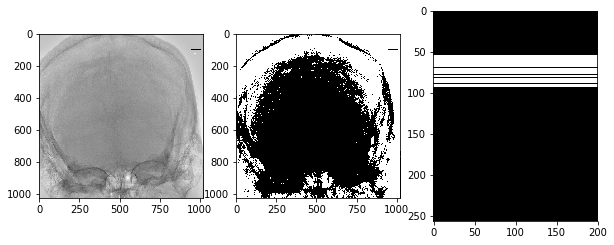

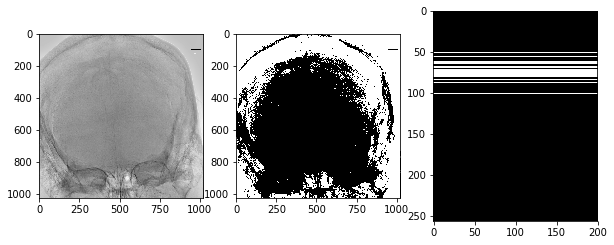

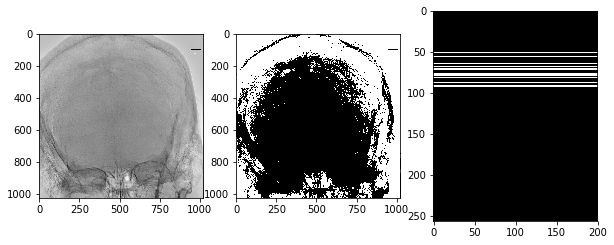

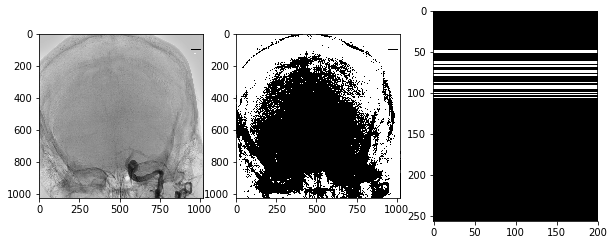

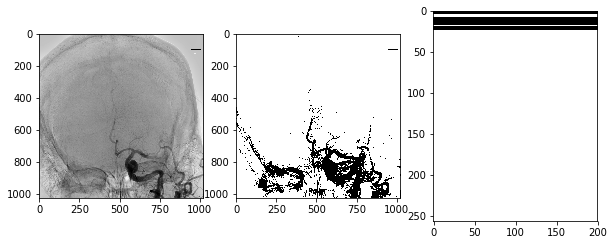

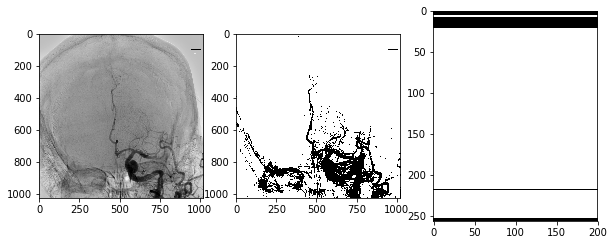

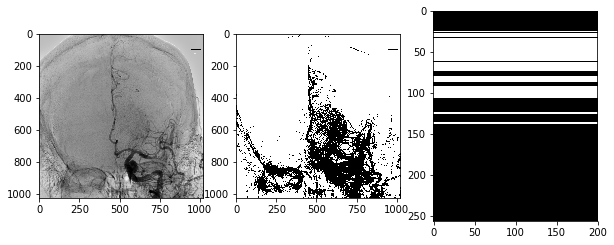

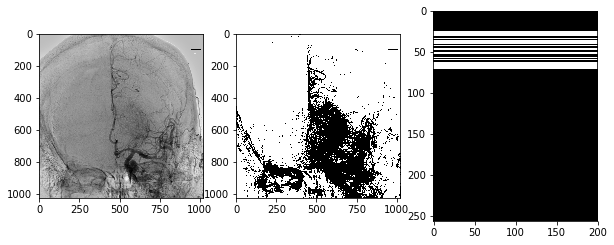

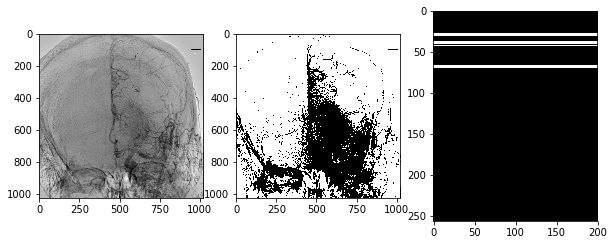

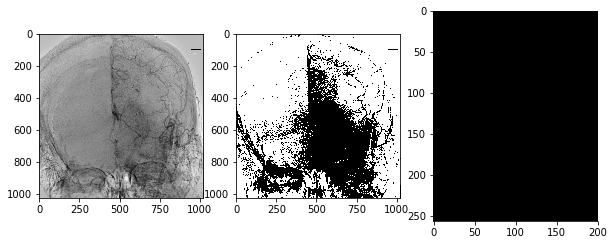

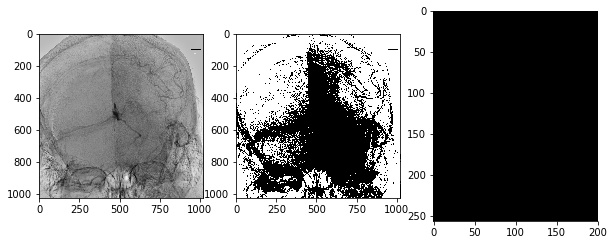

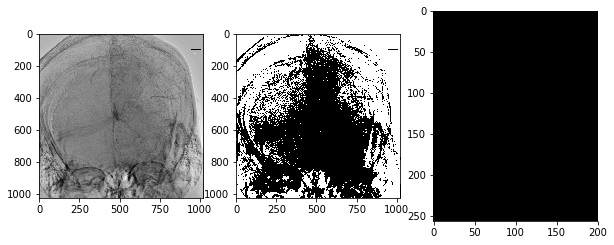

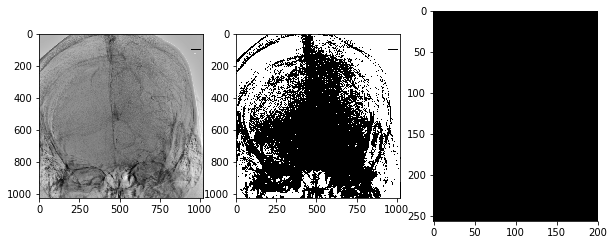

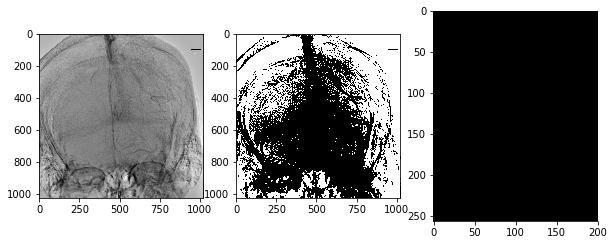

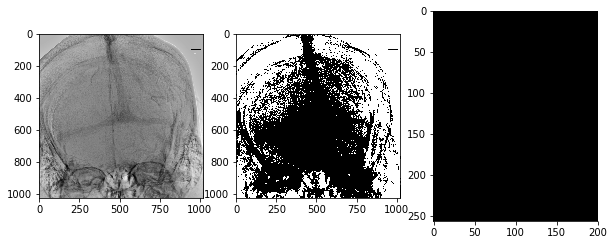

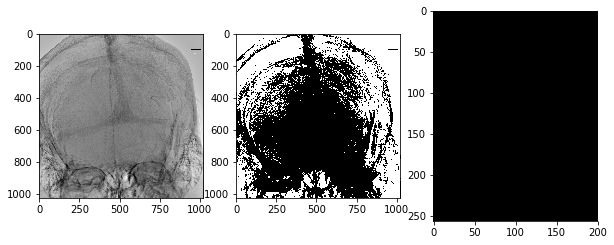

In [60]:
def show_images(all_image_sets):
    if len(all_image_sets) == 0:
        return
    # Assume all image sets have the same number of images.
    image_count = len(all_image_sets[0])
    n_image_sets = len(all_image_sets)
    for n in range(image_count):
        plt.figure(figsize=(10,5))
        for k in range(n_image_sets):
            plt.subplot(1, n_image_sets, k + 1)
            plt.imshow(all_image_sets[k][n], cmap='gray')
            
show_images([image_set, binary_image_set, middle_artery_summary_image_set])